# Diabetes +ve or -ve Classifier on PIMA Indians Diabetes Dataset

In [33]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Statistical Visualization
import seaborn as sns

# Classification or Regression imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#Model Selection Specific

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load Dataset

In [2]:
df = pd.read_csv('../data/pima-indians-diabetes.csv', delimiter=',', header=None)

### Data Format

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

## Add Columns

In [17]:
df.columns = [
    'times_pregnant',
    'glucose_concentration',
    'blood_pressure',
    'skin_thickness',
    'insulin',
    'bmi',
    'pedigree_function',
    'age',
    'class'
]

## Columns As
# 0 - Diabetes -ve
# 1 - Diabetes +ve

# Analyze Dataset

In [18]:
df.head()

,times_pregnant,glucose_concentration,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
df.shape

(768, 9)

### Information about data types and number of instances.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
times_pregnant           768 non-null int64
glucose_concentration    768 non-null int64
blood_pressure           768 non-null int64
skin_thickness           768 non-null int64
insulin                  768 non-null int64
bmi                      768 non-null float64
pedigree_function        768 non-null float64
age                      768 non-null int64
class                    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Check for Null Values

Counting the number of instances with null values.

In [21]:
df.isnull().sum()

times_pregnant           0
glucose_concentration    0
blood_pressure           0
skin_thickness           0
insulin                  0
bmi                      0
pedigree_function        0
age                      0
class                    0
dtype: int64

In [22]:
df.describe()

,times_pregnant,glucose_concentration,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Count number of instances for each quality

In [32]:
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

### Scatter Plot Visuasation

In [14]:
##

# Correlation map between features

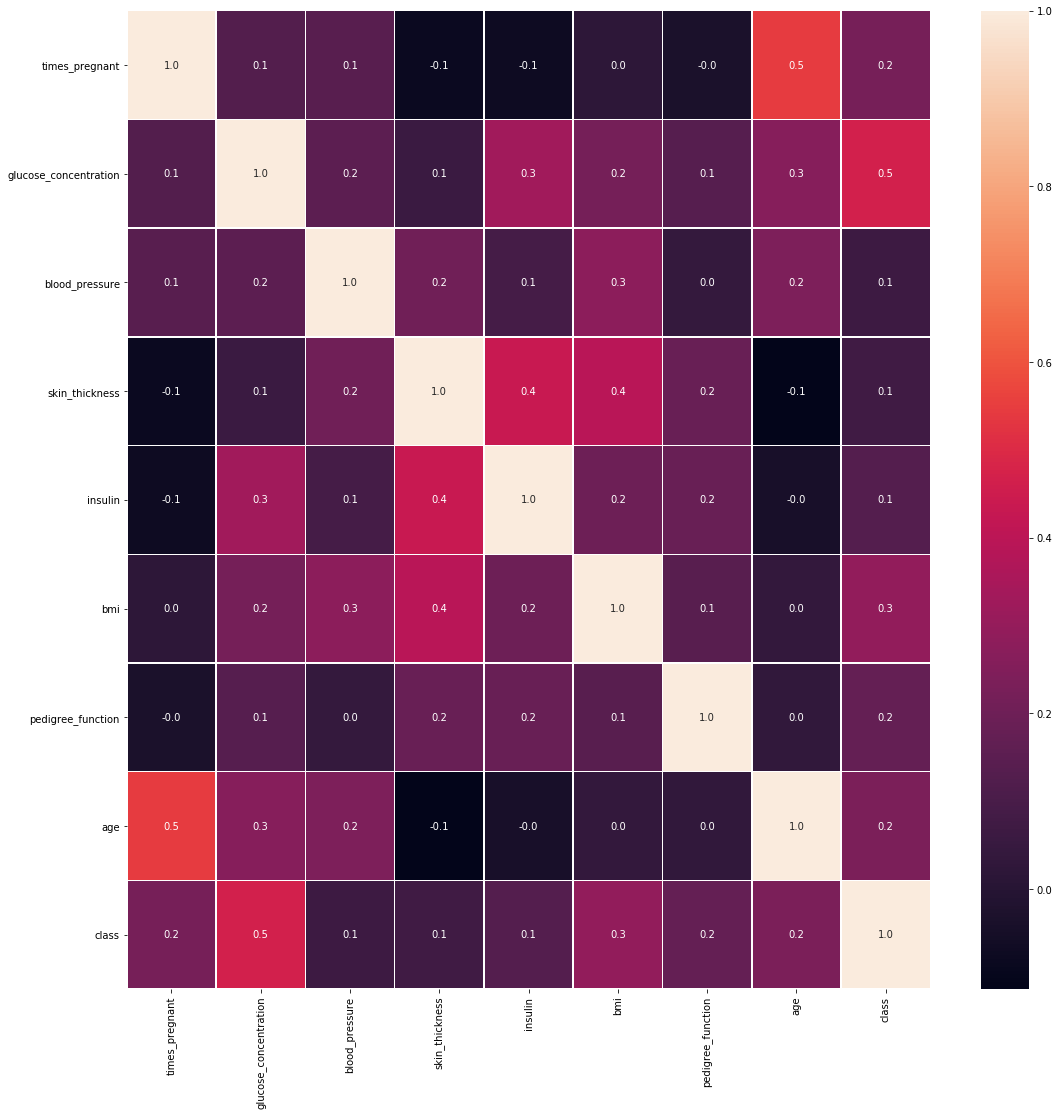

In [27]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Age vs Class Pbarplot

As we can see higher aged subjects are more likely to be tested positive for Diabetes.

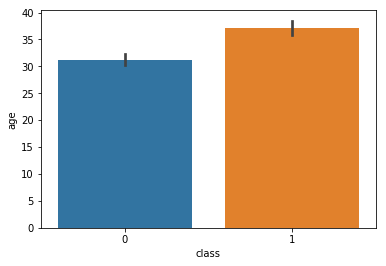

In [37]:
# Age vs Insulin barplot
sns.barplot(x = 'class', y  = 'age', data = df)

In [79]:
# Quality vs volatile acidity barplot
# sns.barplot(x = 'quality', y  = 'volatile acidity', data = df )

In [80]:
# Quality vs Alcohol barplot
# sns.barplot(x = 'quality', y  = 'alcohol', data = df )

# Create Features and Label Splits

In [81]:
X= df.drop(['class'], axis=1)
y = df['class']
X.head()
y.head()

,times_pregnant,glucose_concentration,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

# Train Test Split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify=y)

print(X_train.shape, X_test.shape)

(691, 8) (77, 8)


## Feature Scaling to X_train and X_test to classify better. 

In [75]:
# fsc = StandardScaler()
# X_train = fsc.fit_transform(X_train)
# X_test = fsc.transform(X_test)

In [76]:
models = []

models.append(("Logistic Regression:", LogisticRegression()))
models.append(("K-Nearest Neighbour:", KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree Classifier:", DecisionTreeClassifier()))
models.append(("Random Forest Classifier:", RandomForestClassifier()))
models.append(("SVC:", SVC(kernel = 'rbf', random_state = 0)))

print('Models appended...')

Models appended...


In [77]:
def run_models():
    results = []
    names = []
    for name,model in models:
        cv_result = cross_val_score(model, X_train, y_train.values.ravel(), cv = 5, scoring = "accuracy")
        names.append(name)
        results.append(cv_result)
    for i in range(len(names)):
        print(names[i],results[i].mean()*100)

# Function to run the Models with Cross Validation

In [78]:
run_models()

Logistic Regression: 78.2911062454
K-Nearest Neighbour: 69.7518506934
Decision Tree Classifier: 68.015848191
Random Forest Classifier: 74.5292461683
SVC: 65.1235533312


In this very simple Classifier without any preprocessing **Logistic Regression** has been performing the best with **78.29**% accuracy. 